            avg             title
3  48582.896092  Technique Leader
5  58465.382850             Staff
6  58550.172704      Senior Staff
0  48506.799871   Senior Engineer
4  51531.041667           Manager


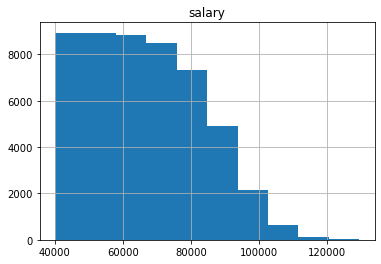

<Figure size 432x288 with 0 Axes>

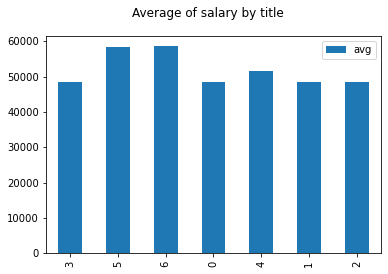

In [3]:
import pandas.io.sql as sqlio
import psycopg2
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="Test")
salaries = """
SELECT DISTINCT
	sal.salary
FROM
	"Salaries" AS sal
;
"""
dat = sqlio.read_sql_query(salaries, conn)
dat.hist()

salariesByTitle = """
SELECT DISTINCT
	AVG(sal.salary),
	tlt.title
FROM
	\"Salaries\" as sal,
	\"Employees\" as emp,
	\"Titles\" as tlt
WHERE
	sal.emp_no = emp.emp_no
	AND
	emp.emp_title_id = tlt.title_id
GROUP BY
	tlt.title
"""

avg = sqlio.read_sql_query(salariesByTitle, conn)
avg = avg.sort_values("title", ascending=False)
plt.figure()
fig, ax = plt.subplots(1, 1)
avg.plot(ax=ax, kind='bar')
fig.suptitle("Average of salary by title")
print(avg.head())
